<h1 style='color: green; font-size: 36px; font-weight: bold;'>PSel - DS - Luis</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [ ]:
import pandas as pd

## O Dataset e o Projeto
Temos o nosso site de vendas e criamos o blog com conteúdo há aproximadamente 3 meses atrás. Com o nosso time de BI nós conseguimos mapear:

1.    Data (formato data; ordinal); 
2.    O número total de pessoas que acessaram o blog por dia acessaram(usuarios_blog);
3.    O número de pessoas que acessaram o site e não passaram pelo blog por dia (usuarios_site);
4.    O número total de compras de pessoas que passaram pelo blog (por dia) (transacoes_blog);
5.    O número total de compras de pessoas que não passaram pelo blog (por dia) (transacoes_site);
6.    Receita das compras que passaram ou não pelo blog por dia (receita).

Queremos entender qual é a influência de um blog da nossa marca para que as pessoas venham a comprar nossos produtos em algum momento. Podem nos ajudar com essa análise?




## Leitura dos dados

In [ ]:
dados = pd.read_csv('psel - data.csv')

## Visualizar os dados

In [ ]:
dados.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


## Verificando o tamanho do dataset

In [ ]:
dados.shape

(639, 6)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,639.00,639.00,639.00,639.00,639.00
mean,1622682.24,528.35,19039.14,1439.85,101610.49
std,1161892.12,1201.78,13677.73,3369.87,37240.23
min,-20220.00,0.00,3557.00,0.00,26298.00
25%,807342.00,0.00,11013.00,0.00,77727.00
50%,1263161.00,0.00,16069.00,0.00,96104.00
75%,2232769.50,0.00,22606.50,0.00,117586.50
max,12266844.00,5586.00,188955.00,13059.00,369989.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(4)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
receita,1.0000,0.5316,0.8121,0.5179,0.7104
transacoes_blog,0.5316,1.0000,0.0689,0.8933,0.1623
transacoes_site,0.8121,0.0689,1.0000,0.0543,0.8200
usuarios_blog,0.5179,0.8933,0.0543,1.0000,0.1518
usuarios_site,0.7104,0.1623,0.8200,0.1518,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [ ]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)

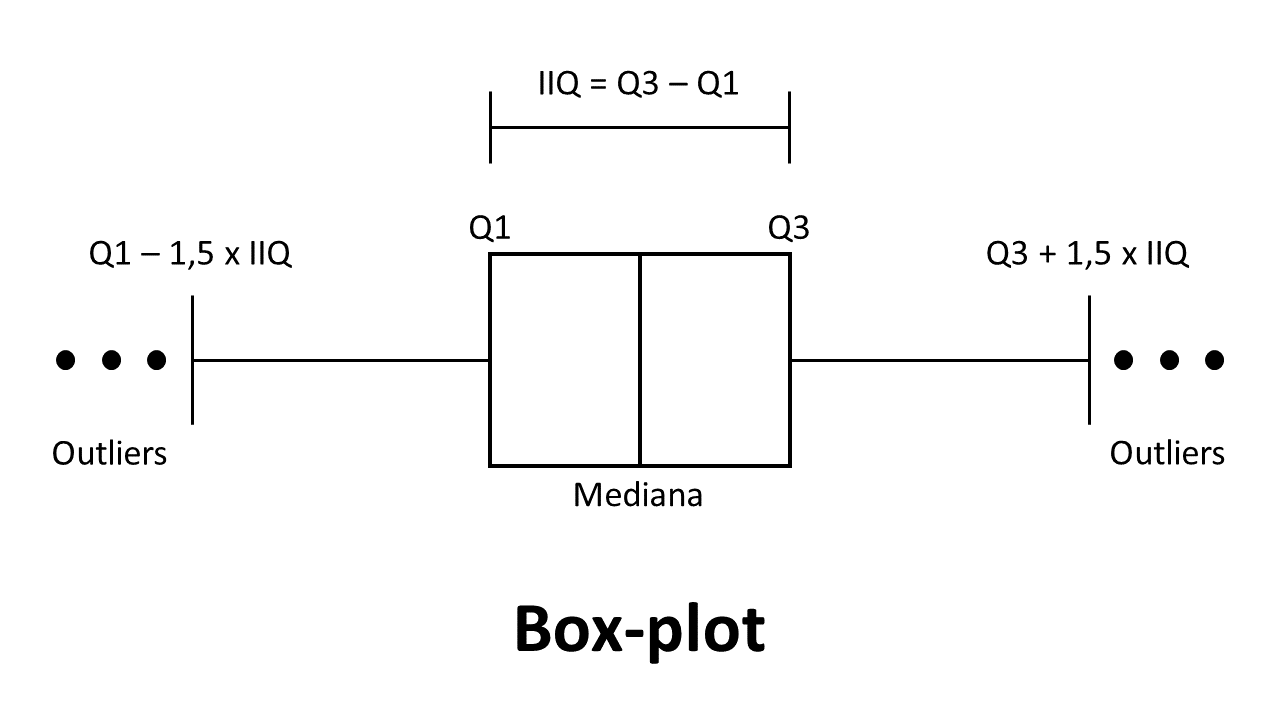

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

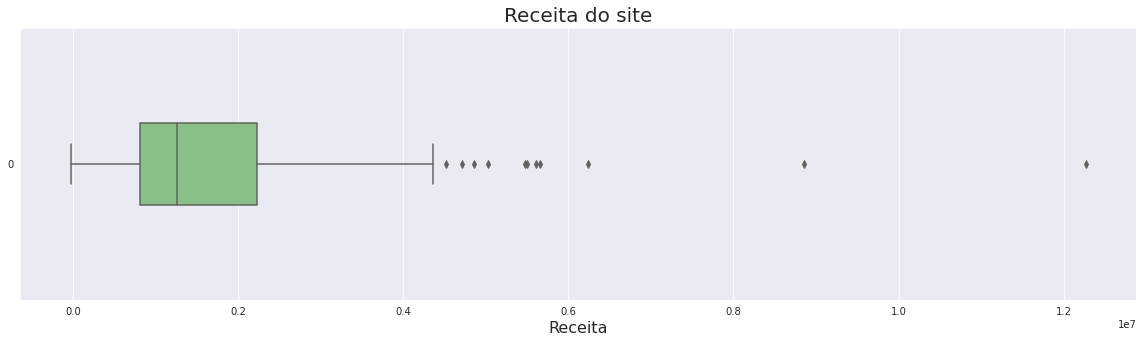

In [ ]:
ax = sns.boxplot(data=dados['receita'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Receita do site', fontsize=20)
ax.set_xlabel('Receita', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


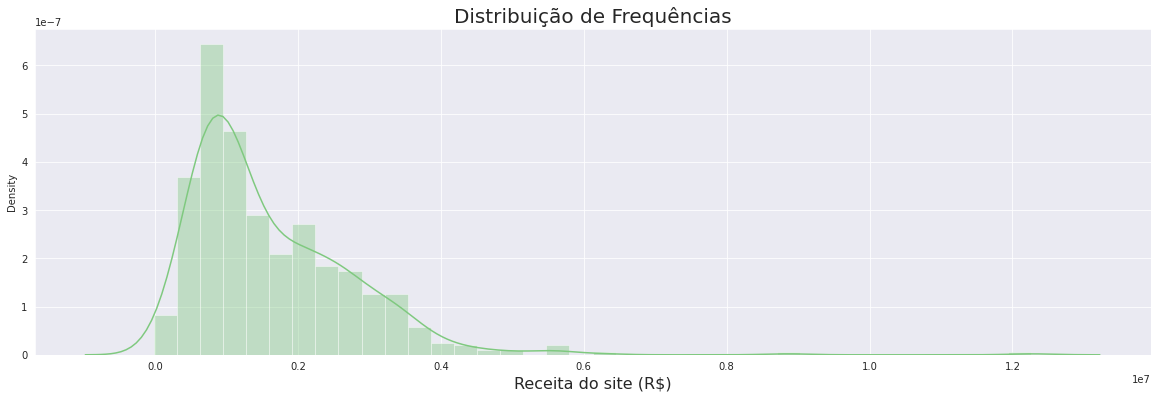

In [ ]:
ax = sns.distplot(dados['receita'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Receita do site (R$)', fontsize=16)
ax

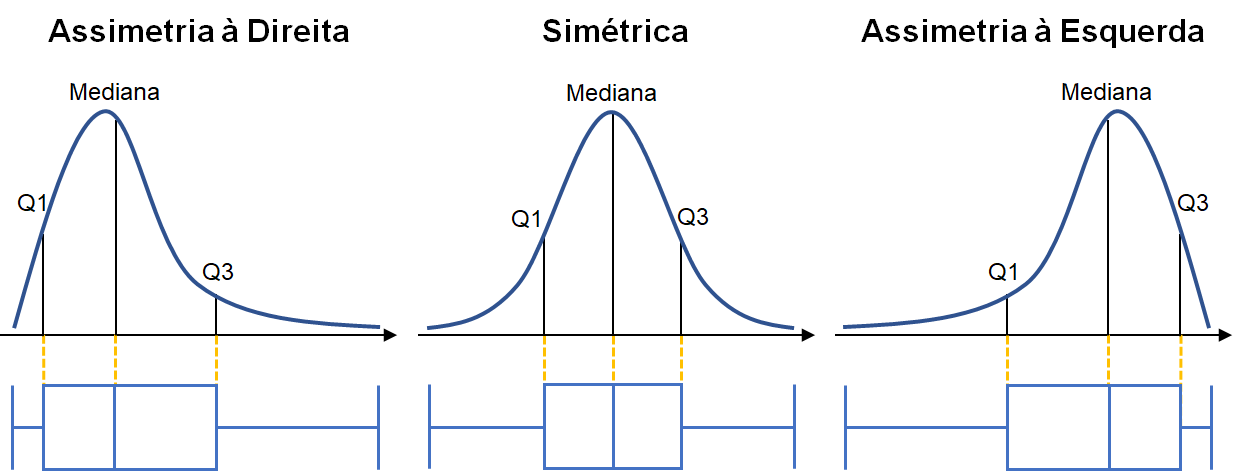

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

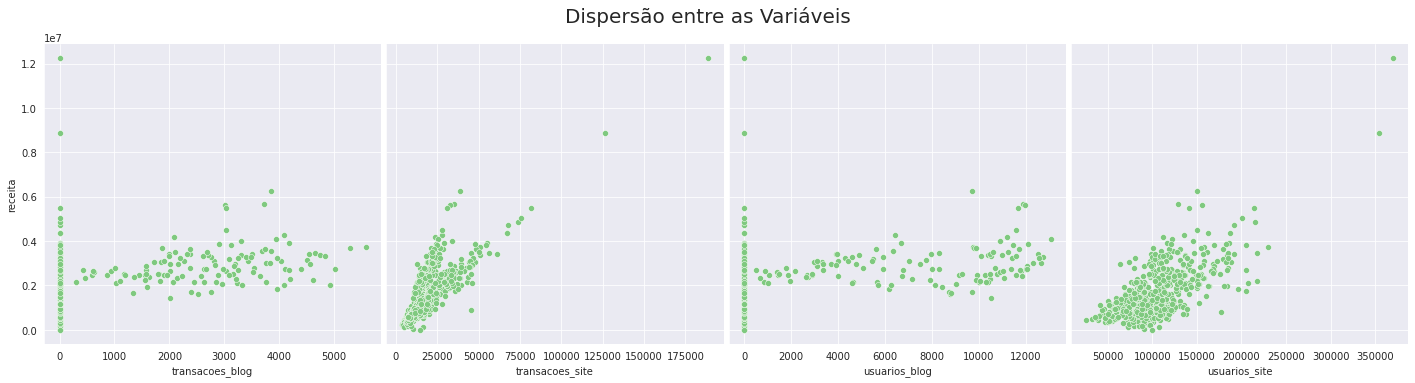

In [ ]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog','usuarios_site'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

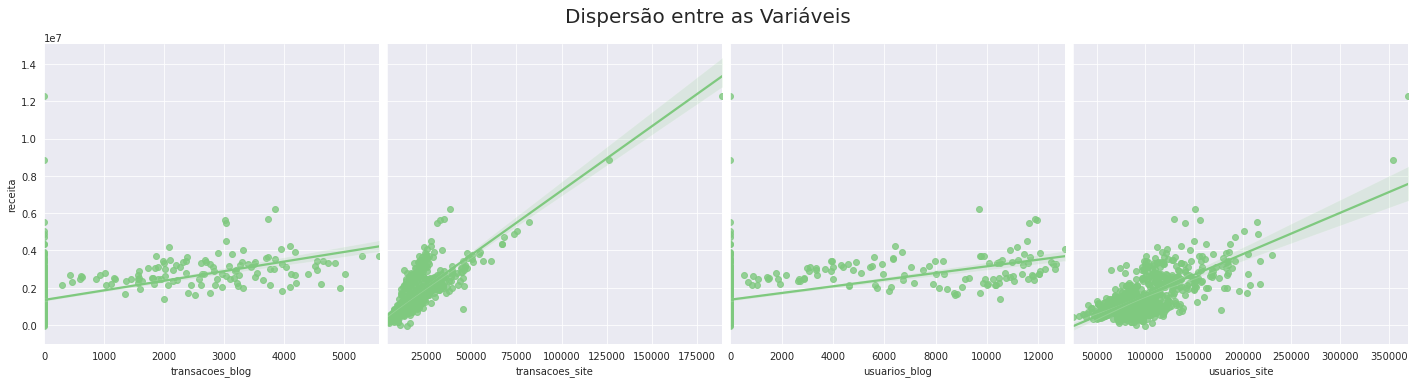

In [ ]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog','usuarios_site'], kind = 'reg',height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [ ]:
import numpy as np

## Normalizando os dados do *dataset*


**ADENDO**

A **transformação logaritmica** deixa a distribuição dos dados da coluna **receita** mais normalizados, porem, a **normalização min-max** entrega um modelo mais forte com a destribuição dos resididuos melhor distribuidos, por isso, a **normalização min-max** foi escolhida.

In [ ]:
dados.columns

Index(['data', 'receita', 'transacoes_blog', 'transacoes_site',
       'usuarios_blog', 'usuarios_site'],
      dtype='object')

In [ ]:
#print(np.log(1))
#print(np.log(0))

In [ ]:
#dados['log_receita'] = np.log(dados['receita'])
#dados['log_transacoes_blog'] = np.log(dados['transacoes_blog'] + 1)
#dados['log_transacoes_site'] = np.log(dados['transacoes_site'])
#dados['log_usuarios_blog'] = np.log(dados['usuarios_blog'] + 1)
#dados['log_usuarios_site'] = np.log(dados['usuarios_site'])

In [ ]:
data = dados['data']

In [ ]:
dados = dados.drop(['data'], axis = 1)

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,0.030064,0.0,0.006127,0.0,0.059475
1,0.072234,0.0,0.026667,0.0,0.165355
2,0.063385,0.0,0.031381,0.0,0.173903
3,0.057711,0.0,0.026149,0.0,0.125302
4,0.037599,0.0,0.013911,0.0,0.086953


In [ ]:
dados['data'] = data

## Distribuição de frequências da variável *dependente transformada* (y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


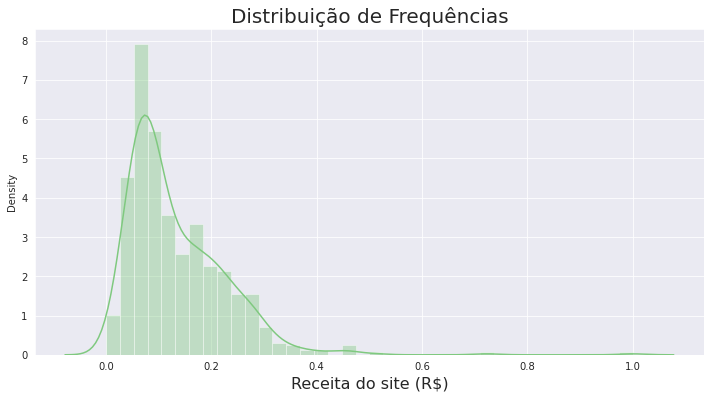

In [ ]:
ax = sns.distplot(dados['receita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Receita do site (R$)', fontsize=16)
ax

In [ ]:
dados.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,639.000000,639.000000,639.000000,639.000000,639.000000
mean,0.133710,0.094585,0.083508,0.110257,0.219128
std,0.094562,0.215142,0.073775,0.258050,0.108354
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067352,0.000000,0.040216,0.000000,0.149637
50%,0.104450,0.000000,0.067487,0.000000,0.203107
75%,0.183363,0.000000,0.102749,0.000000,0.265612
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   receita          639 non-null    float64
 1   transacoes_blog  639 non-null    float64
 2   transacoes_site  639 non-null    float64
 3   usuarios_blog    639 non-null    float64
 4   usuarios_site    639 non-null    float64
 5   data             639 non-null    object 
dtypes: float64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
dados.corr()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
receita,1.000000,0.531579,0.812055,0.517901,0.710413
transacoes_blog,0.531579,1.000000,0.068880,0.893342,0.162275
transacoes_site,0.812055,0.068880,1.000000,0.054284,0.819962
usuarios_blog,0.517901,0.893342,0.054284,1.000000,0.151805
usuarios_site,0.710413,0.162275,0.819962,0.151805,1.000000


# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

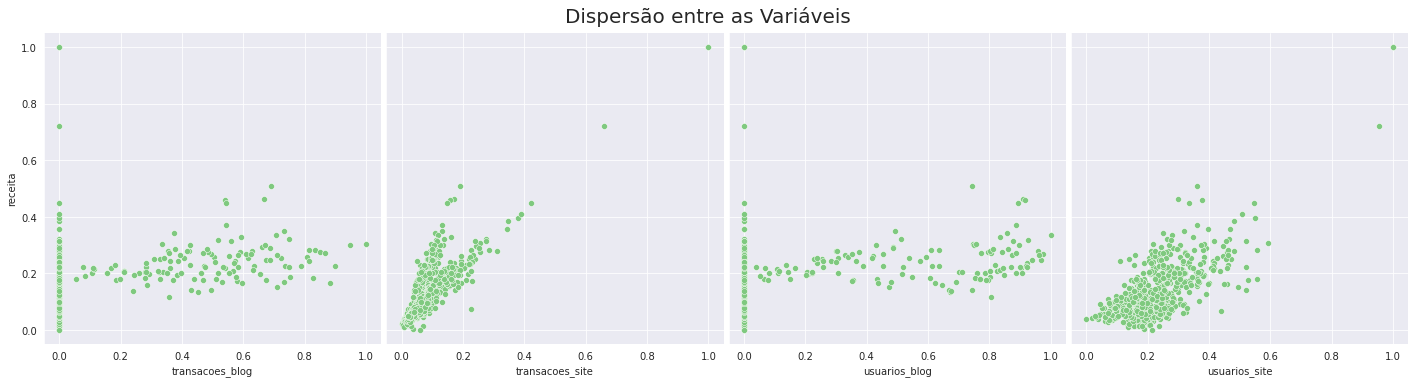

In [ ]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog','usuarios_site'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

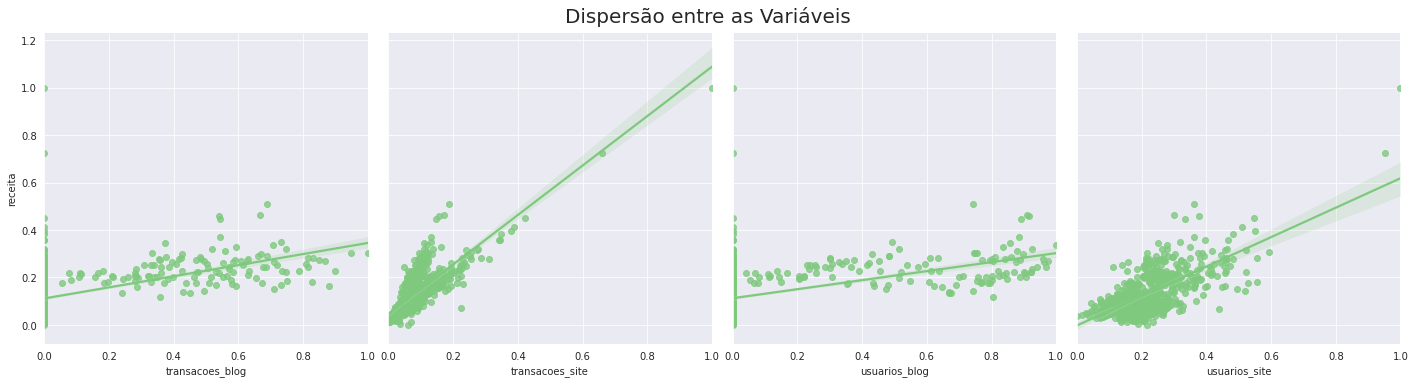

In [ ]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog','usuarios_site'], kind = "reg",height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [ ]:
y = dados['receita']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['transacoes_blog',
           'transacoes_site', 
           'usuarios_blog', 
           'usuarios_site']]

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Estimando o modelo com statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante

,const,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
300,1.0,0.00000,0.035362,0.000000,0.190430
501,1.0,0.00000,0.101565,0.000000,0.201425
88,1.0,0.00000,0.025621,0.000000,0.159795
535,1.0,0.28106,0.098426,0.257447,0.232974
117,1.0,0.00000,0.005960,0.000000,0.135383
...,...,...,...,...,...
71,1.0,0.00000,0.119430,0.000000,0.314349
106,1.0,0.00000,0.018760,0.000000,0.240379
270,1.0,0.00000,0.047363,0.000000,0.126724
435,1.0,0.00000,0.155935,0.000000,0.457219


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     724.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.00e-187
Time:                        03:02:09   Log-Likelihood:                 890.97
No. Observations:                 428   AIC:                            -1772.
Df Residuals:                     423   BIC:                            -1752.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0315      0.004     

#Testando novas combinações de variaveis

In [ ]:
from itertools import combinations

comb = combinations(['transacoes_blog','transacoes_site', 'usuarios_blog', 'usuarios_site'], 2)

for i in list(comb):
    print (i)

('transacoes_blog', 'transacoes_site')
('transacoes_blog', 'usuarios_blog')
('transacoes_blog', 'usuarios_site')
('transacoes_site', 'usuarios_blog')
('transacoes_site', 'usuarios_site')
('usuarios_blog', 'usuarios_site')


In [ ]:
comb1 = dados[['transacoes_blog', 'transacoes_site']]
comb2 = dados[['transacoes_blog', 'usuarios_blog']]
comb3 = dados[['transacoes_blog', 'usuarios_site']]
comb4 = dados[['transacoes_site', 'usuarios_blog']]
comb5 = dados[['transacoes_site', 'usuarios_site']]
comb6 = dados[['usuarios_blog', 'usuarios_site']]

In [ ]:
comb7 = dados[['transacoes_blog', 'transacoes_site', 'usuarios_blog']]
comb8 = dados[['transacoes_blog', 'transacoes_site', 'usuarios_site']]
comb9 = dados[['transacoes_blog', 'usuarios_blog', 'usuarios_site']]
comb10 = dados[['transacoes_site', 'usuarios_blog', 'usuarios_site']]

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [ ]:
y = dados['receita']

#1º Combinação

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb1

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1286.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          5.31e-181
Time:                        03:02:09   Log-Likelihood:                 868.04
No. Observations:                 428   AIC:                            -1730.
Df Residuals:                     425   BIC:                            -1718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0296      0.003     

#2º Combinação

# <font color='red' style='font-size: 30px;'>4.4 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb2

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     134.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.15e-46
Time:                        03:02:09   Log-Likelihood:                 555.03
No. Observations:                 428   AIC:                            -1104.
Df Residuals:                     425   BIC:                            -1092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1070      0.004     

#3º Combinação

# <font color='red' style='font-size: 30px;'>4.5 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb3

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     414.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.38e-100
Time:                        03:02:09   Log-Likelihood:                 681.57
No. Observations:                 428   AIC:                            -1357.
Df Residuals:                     425   BIC:                            -1345.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0114      0.006     

#4º Combinação

# <font color='red' style='font-size: 30px;'>4.6 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb4

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1213.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          2.22e-176
Time:                        03:02:09   Log-Likelihood:                 857.33
No. Observations:                 428   AIC:                            -1709.
Df Residuals:                     425   BIC:                            -1696.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0294      0.003     

#5º Combinação

# <font color='red' style='font-size: 30px;'>4.7 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb5

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     282.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.88e-79
Time:                        03:02:09   Log-Likelihood:                 630.90
No. Observations:                 428   AIC:                            -1256.
Df Residuals:                     425   BIC:                            -1244.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0317      0.007     

#6º Combinação

# <font color='red' style='font-size: 30px;'>4.8 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb6

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     388.9
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.69e-97
Time:                        03:02:10   Log-Likelihood:                 672.65
No. Observations:                 428   AIC:                            -1339.
Df Residuals:                     425   BIC:                            -1327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0113      0.006      1.935

#7º Combinação

# <font color='red' style='font-size: 30px;'>4.9 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb7

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     964.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          5.66e-189
Time:                        03:02:10   Log-Likelihood:                 890.32
No. Observations:                 428   AIC:                            -1773.
Df Residuals:                     424   BIC:                            -1756.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0286      0.003     

#8º Combinação

# <font color='red' style='font-size: 30px;'>4.10 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb8

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     856.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.72e-179
Time:                        03:02:10   Log-Likelihood:                 868.27
No. Observations:                 428   AIC:                            -1729.
Df Residuals:                     424   BIC:                            -1712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0314      0.004     

#9º Combinação

# <font color='red' style='font-size: 30px;'>4.11 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb9

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     286.7
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.30e-101
Time:                        03:02:10   Log-Likelihood:                 687.13
No. Observations:                 428   AIC:                            -1366.
Df Residuals:                     424   BIC:                            -1350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0113      0.006     

#10º Combinação - Melhor modelo

# <font color='red' style='font-size: 30px;'>4.12 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb10

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     808.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          6.22e-175
Time:                        03:02:10   Log-Likelihood:                 857.67
No. Observations:                 428   AIC:                            -1707.
Df Residuals:                     424   BIC:                            -1691.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0317      0.004     

# Repetindo a 7º combinação

# <font color='red' style='font-size: 30px;'>4.9 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
X = comb7

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)

## Estimando o modelo com o statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

### Teste de significância conjunta dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Teste de significância individual dos parâmetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                receita   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     964.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          5.66e-189
Time:                        03:02:10   Log-Likelihood:                 890.32
No. Observations:                 428   AIC:                            -1773.
Df Residuals:                     424   BIC:                            -1756.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0286      0.003     

#<font color='red' style='font-size: 30px;'>5 Interpretação dos resultados</font>
<hr style='border: 2px solid red;'>

##R² e R² ajustado

O modelo que melhor explica a influência do blog da marca na receita das vendas do site é o da **10º Combinação** com um **R² de 0,872** e um **R² ajustado de 0,871**, ou seja, as variaveis independentes que melhor explicam a receita da venda dos produtos do site são:

*   Transações blog
*   Transações site
*   Usuario blog

O motivos desse ser o melhor modelo são as **caracteristica dos coeficientes** **R²** e **R²** ajustado. Toda vez que você adiciona um preditor a um modelo, o R-quadrado aumenta, mesmo que apenas por acaso. Ele nunca diminui. Consequentemente, um modelo com mais termos pode parecer ter um melhor ajuste simplesmente porque tem mais termos.

Se um modelo possui muitos preditores e polinômios de ordem superior, ele começa a modelar o ruído aleatório nos dados. Essa condição é conhecida como **sobreajuste** do modelo e produz valores de R-quadrado ilusoriamente altos e uma capacidade reduzida de fazer predições.

O **R-quadrado ajustado** compara o poder explicativo dos modelos de regressão que contêm diferentes números de preditores.

Suponha que você compare um modelo de cinco preditores que tem um R-quadrado mais alto a um modelo com um preditor. O modelo de cinco preditores têm um R-quadrado mais alto porque é melhor? Ou o R-quadrado é mais alto porque tem mais preditores? Basta comparar os valores do **R-quadrado ajustados** para descobrir!

O **R-quadrado ajustado** é uma versão modificada do R-quadrado que foi ajustada para o número de preditores no modelo. O R-quadrado ajustado aumenta somente se o novo termo melhorar o modelo mais do que seria esperado pelo acaso. Ele diminui quando um preditor melhora o modelo menos do que o esperado por acaso. O R-quadrado ajustado pode ser negativo, mas geralmente não é. É sempre menor que o R-quadrado.



##Teste F e P > | t | 

O teste F (F-statistic) é um teste de hipótese que testa a significância de todos os parâmetros do modelo em conjunto. Um Prob (F-statisc) superior a 0,05 significa que o modelo deve ser descartado pois ele não é estatisticamente significante. 

Temos uma estatística de Teste (F-statistic) de 964.8 e a Aceitação (Prob (F-statisc)) de 5.66e-189, ou seja, o modelo é estatisticamente significante.

Para validar a regressão, temos a coluna **P>| t |** com os valores de 0,000 para a variável **transações blog**, 0,000 para **transações site**, 0,000 para **usuario blog** e 0,000 para a **constante**, rejeitando a Hipótese nula H0 do teste t ao nível de significância de 5%, validando todas a variáveis, ou seja, **transações blog**, **transações site** e **usuario blog** possuem influência significativa sobre a receita das vendas do site.

A variavel **usuarios site** não demonstrou ser estatisticamente significante para explicar a variavel **receita.**

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score



In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.872


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.928


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

# <font color='red' style='font-size: 30px;'>5.2 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (receita) tendo todas as variáveis explicativas excluídas do modelo..</p>

In [ ]:
modelo.intercept_

0.028615082861713992

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_1$, $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os coeficientes angulares $\beta_1$, $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_1$, $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_1$ ,$X_2$ e $X_3$.</p>

In [ ]:
modelo.coef_

array([0.12270673, 1.00334536, 0.08242399])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
X.columns

Index(['transacoes_blog', 'transacoes_site', 'usuarios_blog'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['intercepto','transacoes_blog', 'transacoes_site', 'usuarios_blog']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
intercepto,0.028615
transacoes_blog,0.122707
transacoes_site,1.003345
usuarios_blog,0.082424


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativa  ($X_1=X_2=X_3=0$) temos uma constante de <b>0,02</b>, que é o valor base da reta da regressão.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>transaçoes blog</b> → Mantendo-se o valor de $X_2$ e $X_3$  (transações site e usuarios blog) constantes, um acréscimo de 1% no  número total de compras de pessoas que passaram pelo blog (por dia) gera, em média, um acréscimo de <b>0,12%</b> na receita das vendas do site.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>transações site)</b> → Mantendo-se o valor de $X_1$ e $X_3$ (transaçôes blog e usuarios blog) constantes, um acréscimo de 1% no  número total de compras de pessoas que não passaram pelo blog gera, em média, um acréscimo de <b>1,00%</b> na receita das vendas do site.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Usuario blog</b> → Mantendo-se o valor de $X_1$ e $X_2$ (transações blog e transações site) constante, um acréscimo de 1% no número total de pessoas que acessaram o blog por dia gera, em média, um acréscimo de <b>0,08%</b> na receita das vendas do site.
</p>

# <font color='red' style='font-size: 30px;'>5.3 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

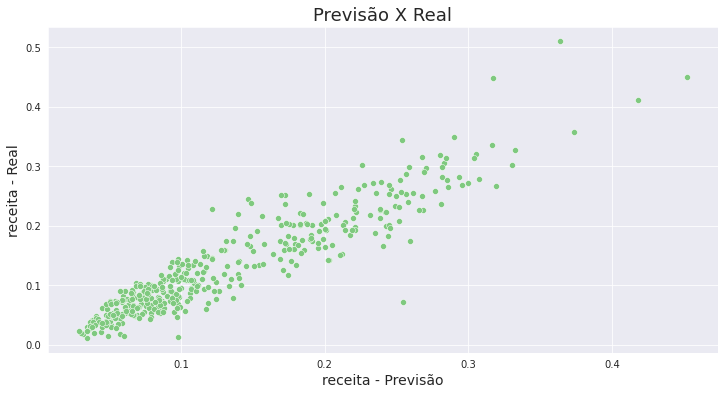

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('receita - Previsão', fontsize=14)
ax.set_ylabel('receita - Real', fontsize=14)
ax

É possivel ver que há uma correlação positiva forte entre os dados previstos e reais.

Não há uma grande dispersão no gráfico, o que indica que a estimativa é bem precisa. 

## Obtendo os resíduos

In [ ]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


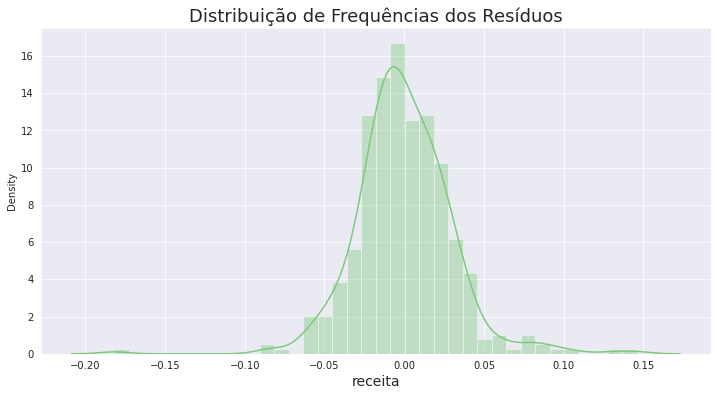

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('receita', fontsize=14)
ax

Como resultado, temos uma curva agradável, proxima de uma distribuição normal, que indica dados bem comportados, o que significa um modelo bem estimado.